In [2]:
import pandas as pd

# Read the cleaned dataset
df = pd.read_csv('../data/cleaned_df.csv')
df.head()

,user_id,order_id,correct,answer_type,attempt_count,sequence_id,skill_name,hint_count,overlap_time
0,77912,20223948,1.0,algebra,1,2655,Effect of Changing Dimensions of a Shape Prpor...,0,95637
1,77912,20223955,1.0,choose_1,1,2655,Effect of Changing Dimensions of a Shape Prpor...,0,227226
2,77912,20223963,1.0,choose_1,1,2655,Effect of Changing Dimensions of a Shape Prpor...,0,165891
3,77912,20223971,1.0,choose_1,1,2655,Effect of Changing Dimensions of a Shape Prpor...,0,129112
4,77912,20223984,1.0,choose_1,1,2655,"Addition Whole Numbers,",0,87127


In [3]:
# Now sort by user_id and order_id
df = df.sort_values(['user_id', 'order_id'])
df.head()

,user_id,order_id,correct,answer_type,attempt_count,sequence_id,skill_name,hint_count,overlap_time
455264,26787,34955672,1.0,algebra,1,11069,Addition and Subtraction Integers,0,12044
455265,26787,34955681,1.0,algebra,1,11069,Addition and Subtraction Integers,0,3728
455266,26787,34955693,1.0,algebra,1,11069,Addition and Subtraction Integers,0,4241
455267,26787,34955702,1.0,algebra,1,11069,Addition and Subtraction Integers,0,4161
455268,26787,34955716,1.0,algebra,1,11069,Addition and Subtraction Integers,0,7674


In [4]:
# One-hot encode 'skill_name' column, handling multiple skills separated by ','
from sklearn.preprocessing import MultiLabelBinarizer

# Split skill_name by ',' and strip whitespace, remove empty strings
def clean_skill_list(skill_str):
    if pd.isnull(skill_str):
        return []
    return [s.strip() for s in skill_str.split(',') if s.strip() != '']

df['skill_name_split'] = df['skill_name'].apply(clean_skill_list)

# # One-hot encode using MultiLabelBinarizer
# mlb = MultiLabelBinarizer()
# skill_ohe = pd.DataFrame(mlb.fit_transform(df['skill_name_split']), columns=mlb.classes_, index=df.index)

# # Concatenate one-hot encoded skills to the original DataFrame
# df = pd.concat([df, skill_ohe], axis=1)

# Drop the temporary split column if not needed
# df = df.drop(columns=['skill_name_split'])

# Now 'df' contains one-hot encoded skill columns
df.head()

,user_id,order_id,correct,answer_type,attempt_count,sequence_id,skill_name,hint_count,overlap_time,skill_name_split
455264,26787,34955672,1.0,algebra,1,11069,Addition and Subtraction Integers,0,12044,[Addition and Subtraction Integers]
455265,26787,34955681,1.0,algebra,1,11069,Addition and Subtraction Integers,0,3728,[Addition and Subtraction Integers]
455266,26787,34955693,1.0,algebra,1,11069,Addition and Subtraction Integers,0,4241,[Addition and Subtraction Integers]
455267,26787,34955702,1.0,algebra,1,11069,Addition and Subtraction Integers,0,4161,[Addition and Subtraction Integers]
455268,26787,34955716,1.0,algebra,1,11069,Addition and Subtraction Integers,0,7674,[Addition and Subtraction Integers]


In [4]:
# One-hot encode the 'answer_type' column for df, outputting 1/0 (default for get_dummies)
answer_type_ohe = pd.get_dummies(df['answer_type'], prefix='answer_type', dtype=int)

# Concatenate the one-hot encoded columns to df
df = pd.concat([df, answer_type_ohe], axis=1)

df.head()

,user_id,order_id,correct,answer_type,attempt_count,sequence_id,skill_name,hint_count,overlap_time,skill_name_split,answer_type_algebra,answer_type_choose_1,answer_type_fill_in_1
455264,26787,34955672,1.0,algebra,1,11069,Addition and Subtraction Integers,0,12044,[Addition and Subtraction Integers],1,0,0
455265,26787,34955681,1.0,algebra,1,11069,Addition and Subtraction Integers,0,3728,[Addition and Subtraction Integers],1,0,0
455266,26787,34955693,1.0,algebra,1,11069,Addition and Subtraction Integers,0,4241,[Addition and Subtraction Integers],1,0,0
455267,26787,34955702,1.0,algebra,1,11069,Addition and Subtraction Integers,0,4161,[Addition and Subtraction Integers],1,0,0
455268,26787,34955716,1.0,algebra,1,11069,Addition and Subtraction Integers,0,7674,[Addition and Subtraction Integers],1,0,0


In [5]:
# Drop 'skill_name' and 'answer_type' columns from df
df = df.drop(columns=['sequence_id'])
df.head()

,user_id,order_id,correct,answer_type,attempt_count,skill_name,hint_count,overlap_time,skill_name_split
455264,26787,34955672,1.0,algebra,1,Addition and Subtraction Integers,0,12044,[Addition and Subtraction Integers]
455265,26787,34955681,1.0,algebra,1,Addition and Subtraction Integers,0,3728,[Addition and Subtraction Integers]
455266,26787,34955693,1.0,algebra,1,Addition and Subtraction Integers,0,4241,[Addition and Subtraction Integers]
455267,26787,34955702,1.0,algebra,1,Addition and Subtraction Integers,0,4161,[Addition and Subtraction Integers]
455268,26787,34955716,1.0,algebra,1,Addition and Subtraction Integers,0,7674,[Addition and Subtraction Integers]


In [6]:
from sklearn.preprocessing import MinMaxScaler

# Scale 'overlap_time', 'hint_count', and 'attempt_count' in df using MinMaxScaler
scaler = MinMaxScaler()
for col in ['overlap_time', 'hint_count', 'attempt_count']:
    if col in df.columns:
        df[col] = scaler.fit_transform(df[[col]])

df[['overlap_time', 'hint_count', 'attempt_count']].head()

,overlap_time,hint_count,attempt_count
455264,0.003549,0.0,0.000419
455265,0.003539,0.0,0.000419
455266,0.003540,0.0,0.000419
455267,0.003540,0.0,0.000419
455268,0.003544,0.0,0.000419


Prepare Sequences

In [7]:
# 1. Get all unique skills from all arrays in 'skill_name_split'
all_skills = sorted({skill for skills in df['skill_name_split'] for skill in skills})
skill2id = {skill: idx for idx, skill in enumerate(all_skills)}

# 2. Map each skill array to an array of skill_ids
df['skill_ids'] = df['skill_name_split'].apply(lambda skills: [skill2id[s] for s in skills if s in skill2id])

num_skills = len(all_skills)
print(f"Number of unique skills: {num_skills}")

# 3. Create question_type_id
df['question_type_id'] = pd.Categorical(df['answer_type']).codes
num_question_types = df['question_type_id'].nunique()
print(f"Number of unique question types: {num_question_types}")

# 4. Show the head of (skill_ids, skill_name_split, question_type_id, answer_type) pairings
print(df[['skill_ids', 'skill_name_split', 'question_type_id', 'answer_type']].tail(10))

Number of unique skills: 174
Number of unique question types: 3
         skill_ids                                   skill_name_split  \
541459        [65]                                      [Graph Shape]   
541460        [65]                                      [Graph Shape]   
541461  [152, 158]                                 [Table, Unit Rate]   
541462  [152, 158]                                 [Table, Unit Rate]   
541463         [7]                [Addition and Subtraction Integers]   
541464         [7]                [Addition and Subtraction Integers]   
541465      [7, 6]  [Addition and Subtraction Integers, Addition a...   
541466      [7, 8]  [Addition and Subtraction Integers, Addition a...   
541467      [7, 8]  [Addition and Subtraction Integers, Addition a...   
541468      [7, 6]  [Addition and Subtraction Integers, Addition a...   

        question_type_id answer_type  
541459                 0     algebra  
541460                 0     algebra  
541461         

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

def prepare_dkt_sequences(df, num_skills=num_skills, max_seq_len=100, 
                          extra_features_cols=['attempt_count', 'hint_count', 'overlap_time']):
    """
    Prepares student interaction sequences for DKT-style LSTM input.
    Handles multiple skills per sample by encoding each skill separately.
    """
    input_seqs = []
    output_seqs = []
    extras = []

    grouped = df.sort_values('order_id').groupby('user_id')

    for _, group in grouped:
        x_seq = []
        y_seq = []

        skill_ids_list = group['skill_ids'].values  # Each is a list of skill ids
        corrects = group['correct'].values
        question_types = group['question_type_id'].values

        for i in range(len(skill_ids_list) - 1):
            skills = skill_ids_list[i]
            correct = int(corrects[i])
            qtype = question_types[i]
            next_skills = skill_ids_list[i+1]
            next_correct = corrects[i+1]

            # Encode each skill in the current step
            for skill in skills:
                x_encoded = skill + correct * num_skills + qtype * num_skills * 2
                x_seq.append(x_encoded)

            # Target: one-hot for each next_skill, value is next_correct
            y_vec = np.zeros(num_skills)
            for next_skill in next_skills:
                if isinstance(next_skill, (int, np.integer)) and 0 <= next_skill < num_skills:
                    y_vec[int(next_skill)] = next_correct
            y_seq.append(y_vec)

        if len(x_seq) > 0:
            input_seqs.append(x_seq)
            output_seqs.append(y_seq)
            if extra_features_cols:
                extras.append(group[extra_features_cols].iloc[1:].values.tolist())

    # Pad all sequences
    X_input = pad_sequences(input_seqs, padding='post', maxlen=max_seq_len)
    Y_output = pad_sequences(output_seqs, padding='post', maxlen=max_seq_len, dtype='float32')

    # Handle extra features
    extra_inputs = None
    if extra_features_cols:
        extra_inputs = pad_sequences(extras, padding='post', maxlen=max_seq_len, dtype='float32')

    # Print encoding distribution for debug
    import collections
    all_encodings = [enc for seq in input_seqs for enc in seq]
    encoding_counts = collections.Counter(all_encodings)
    print(f"\nTop 20 most common input encodings (skill+correct+qtype):")
    for k, v in encoding_counts.most_common(20):
        print(f"Encoding {k}: {v} times")
    print(f"\nLeast 20 input encodings (skill+correct+qtype):")
    for k, v in encoding_counts.most_common()[-20:]:
        print(f"Encoding {k}: {v} times")
    print(f"Total unique input encodings: {len(encoding_counts)}")

    return X_input, Y_output, extra_inputs

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate, TimeDistributed
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import Constant

def build_dkt_model(
    num_skills=num_skills,
    num_extra_features=3,
    num_question_types=3,
    embedding_dim=32,
    lstm_units=80,
    use_bilstm=True,
    dropout_rate=0.3,
    learning_rate=0.002,
    pretrained_skill_embeddings=None,  # shape: (num_total_inputs, embedding_dim)
    trainable=False
):
    num_total_inputs = num_skills * 2 * num_question_types

    # Inputs
    skill_input = Input(shape=(None,), name='skill_input')
    extra_input = Input(shape=(None, num_extra_features), name='extra_input')

    if pretrained_skill_embeddings is not None:
        # Use pretrained SentenceTransformer embeddings
        skill_embed = Embedding(
            input_dim=num_total_inputs,
            output_dim=embedding_dim,
            embeddings_initializer=Constant(pretrained_skill_embeddings),
            trainable=trainable,
            name='pretrained_skill_embedding'
        )(skill_input)
    else:
        # Learn embedding from scratch 
        skill_embed = Embedding(
            input_dim=num_total_inputs,
            output_dim=embedding_dim,
            name='skill_embedding'
        )(skill_input)

    # Merge skill embeddings and extra features
    merged_input = Concatenate(name='concat_inputs')([skill_embed, extra_input])
    merged_input = Dropout(dropout_rate)(merged_input)

    # LSTM or BiLSTM
    if use_bilstm:
        lstm_out = Bidirectional(
            LSTM(units=lstm_units, return_sequences=True, dropout=dropout_rate),
            name='bilstm_layer'
        )(merged_input)
    else:
        lstm_out = LSTM(units=lstm_units, return_sequences=True, dropout=dropout_rate, name='lstm_layer')(merged_input)

    # Output
    predictions = TimeDistributed(Dense(num_skills, activation='sigmoid'), name='predictions')(lstm_out)

    # Compile
    optimizer = Adam(learning_rate=learning_rate)
    model = Model(inputs=[skill_input, extra_input], outputs=predictions)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['AUC'])

    return model



In [10]:
X, y, extras = prepare_dkt_sequences(df, max_seq_len=100)


Top 20 most common input encodings (skill+correct+qtype):
Encoding 181: 11225 times
Encoding 260: 9132 times
Encoding 624: 8117 times
Encoding 587: 7919 times
Encoding 630: 7439 times
Encoding 618: 7082 times
Encoding 466: 7008 times
Encoding 631: 6254 times
Encoding 674: 5962 times
Encoding 145: 5781 times
Encoding 641: 5743 times
Encoding 640: 5646 times
Encoding 413: 5518 times
Encoding 276: 5385 times
Encoding 877: 5211 times
Encoding 635: 5182 times
Encoding 972: 5168 times
Encoding 529: 4931 times
Encoding 988: 4924 times
Encoding 113: 4868 times

Least 20 input encodings (skill+correct+qtype):
Encoding 117: 3 times
Encoding 205: 3 times
Encoding 262: 3 times
Encoding 374: 3 times
Encoding 818: 3 times
Encoding 168: 3 times
Encoding 149: 2 times
Encoding 786: 2 times
Encoding 110: 2 times
Encoding 26: 2 times
Encoding 137: 1 times
Encoding 172: 1 times
Encoding 1031: 1 times
Encoding 807: 1 times
Encoding 284: 1 times
Encoding 806: 1 times
Encoding 277: 1 times
Encoding 548: 1 t

In [11]:
X.shape

(6950, 100)

In [293]:
y.shape

(6950, 100, 174)

In [294]:
extras.shape

(6950, 100, 3)

In [11]:
from sklearn.model_selection import train_test_split

# Split into train and validation sets (80/20 split)
X_train, X_val, y_train, y_val, extras_train, extras_val = train_test_split(
    X, y, extras, test_size=0.2, random_state=42
)

print(f"Train shapes: X={X_train.shape}, y={y_train.shape}, extras={extras_train.shape}")
print(f"Validation shapes: X={X_val.shape}, y={y_val.shape}, extras={extras_val.shape}")


Train shapes: X=(5560, 100), y=(5560, 100, 174), extras=(5560, 100, 3)
Validation shapes: X=(1390, 100), y=(1390, 100, 174), extras=(1390, 100, 3)


In [ ]:
from itertools import product

embedding_dims = [64, 128]
lstm_units_list =  [64, 128, 256]
bilstm_options = [True, False]
batch_sizes = [16, 32]
results = []

for emb_dim, lstm_units, use_bilstm, batch_size in product(embedding_dims, lstm_units_list, bilstm_options, batch_sizes):
    print(f"\nTraining with embedding_dim={emb_dim}, lstm_units={lstm_units}, use_bilstm={use_bilstm}, batch_size={batch_size}")
    model = build_dkt_model(
        num_skills=num_skills,
        num_extra_features=3,
        num_question_types=num_question_types,
        embedding_dim=emb_dim,
        lstm_units=lstm_units,
        use_bilstm=use_bilstm
    )
    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = model.fit(
        x={'skill_input': X_train, 'extra_input': extras_train},
        y=y_train,
        batch_size=batch_size,
        epochs=3,  # Use fewer epochs for grid search speed
        validation_data=({'skill_input': X_val, 'extra_input': extras_val}, y_val),
        callbacks=[early_stop],
        verbose=0
    )
    best_val_auc = max(history.history['val_AUC'])
    print(f"Best val_AUC: {best_val_auc:.4f}")
    results.append({
        'embedding_dim': emb_dim,
        'lstm_units': lstm_units,
        'use_bilstm': use_bilstm,
        'batch_size': batch_size,
        'best_val_auc': best_val_auc
    })

# Show sorted results
results = sorted(results, key=lambda x: x['best_val_auc'], reverse=True)
print("\nTop grid search results:")
for r in results[:8]:
    print(r)

Main student agent

In [ ]:
model = build_dkt_model(embedding_dim=64, lstm_units=128, use_bilstm=True, learning_rate=0.002)
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, min_delta=0.0002)
history = model.fit(
    x={'skill_input': X_train, 'extra_input': extras_train},
    y=y_train,
    batch_size=16,
    epochs=25, 
    validation_data=({'skill_input': X_val, 'extra_input': extras_val}, y_val),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/25
348/348 ━━━━━━━━━━━━━━━━━━━━ 291s 813ms/step - AUC: 0.6083 - loss: 0.0764 - val_AUC: 0.7717 - val_loss: 0.0120
Epoch 2/25
348/348 ━━━━━━━━━━━━━━━━━━━━ 359s 1s/step - AUC: 0.7859 - loss: 0.0119 - val_AUC: 0.7899 - val_loss: 0.0115
Epoch 3/25
348/348 ━━━━━━━━━━━━━━━━━━━━ 357s 1s/step - AUC: 0.8051 - loss: 0.0113 - val_AUC: 0.8053 - val_loss: 0.0111
Epoch 4/25
348/348 ━━━━━━━━━━━━━━━━━━━━ 366s 978ms/step - AUC: 0.8196 - loss: 0.0113 - val_AUC: 0.8311 - val_loss: 0.0107
Epoch 5/25
348/348 ━━━━━━━━━━━━━━━━━━━━ 338s 971ms/step - AUC: 0.8358 - loss: 0.0108 - val_AUC: 0.8519 - val_loss: 0.0104
Epoch 6/25
348/348 ━━━━━━━━━━━━━━━━━━━━ 338s 972ms/step - AUC: 0.8560 - loss: 0.0102 - val_AUC: 0.8579 - val_loss: 0.0100
Epoch 7/25
348/348 ━━━━━━━━━━━━━━━━━━━━ 350s 1s/step - AUC: 0.8684 - loss: 0.0099 - val_AUC: 0.8746 - val_loss: 0.0095
Epoch 8/25
348/348 ━━━━━━━━━━━━━━━━━━━━ 358s 1s/step - AUC: 0.8808 - loss: 0.0096 - val_AUC: 0.8813 - val_loss: 0.0090
Epoch 9/25
348/348 ━━━━━━━━━━━━━━━━━

In [12]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title("Loss over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Binary Crossentropy")
    plt.legend()

    # AUC
    plt.subplot(1, 2, 2)
    plt.plot(history.history['AUC'], label='Train AUC')
    plt.plot(history.history['val_AUC'], label='Val AUC')
    plt.title("AUC over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()

    plt.tight_layout()
    plt.show()


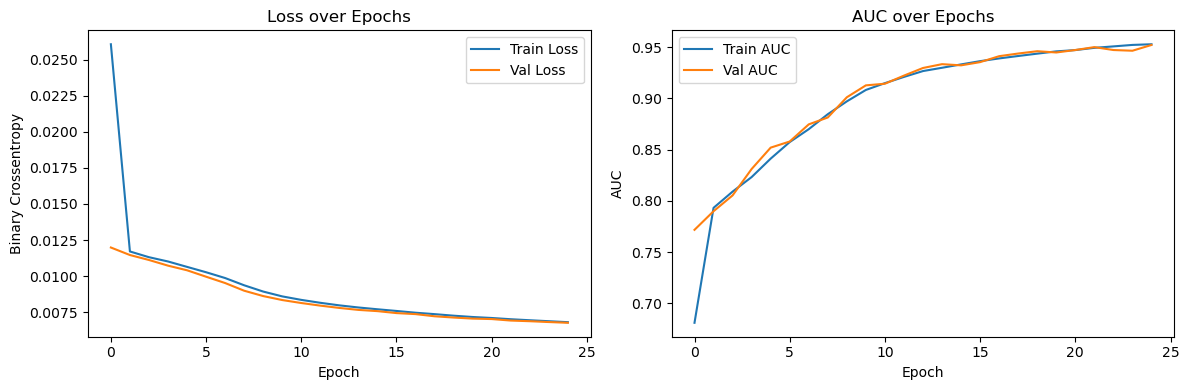

In [298]:
plot_history(history)

In [299]:
save_dir = '../models'
model.save(f'{save_dir}/dkt_model_100.keras')  

Using text embedding for DKT

In [13]:
# Create skill_texts as "Skill {skill_names}, Correct: {correctness}, QType: {answer_type}" for each row
skill_texts = [
    f"Skill: {', '.join(skills)}, Correct: {row['correct']}, QType: {row['answer_type']}"
    for _, row in df.iterrows()
    for skills in [row['skill_name_split']]
]

In [ ]:
skill_texts[60:80]  # Show skill texts

['Skill: Division Fractions, Correct: 1.0, QType: algebra',
 'Skill: Addition and Subtraction Integers, Addition and Subtraction Fractions, Correct: 1.0, QType: algebra',
 'Skill: Addition and Subtraction Integers, Addition and Subtraction Fractions, Correct: 1.0, QType: algebra',
 'Skill: Ordering Fractions, Correct: 1.0, QType: choose_1',
 'Skill: Ordering Fractions, Correct: 1.0, QType: choose_1',
 'Skill: Ordering Fractions, Correct: 1.0, QType: choose_1',
 'Skill: Ordering Fractions, Correct: 1.0, QType: algebra',
 'Skill: Ordering Fractions, Correct: 1.0, QType: algebra',
 'Skill: Ordering Fractions, Correct: 1.0, QType: algebra',
 'Skill: Ordering Fractions, Correct: 1.0, QType: algebra',
 'Skill: Ordering Fractions, Correct: 1.0, QType: algebra',
 'Skill: Addition and Subtraction Positive Decimals, Correct: 1.0, QType: algebra',
 'Skill: Addition and Subtraction Positive Decimals, Correct: 1.0, QType: algebra',
 'Skill: Addition and Subtraction Positive Decimals, Correct: 1.0, 

In [29]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np

df['correct'] = (df['correct'] > 0.5).astype(int)

# Build skill_texts for all possible input encodings (for embedding matrix)
skill_texts = []
for skill_id in range(num_skills):
    for correct in [0, 1]:
        for qtype in range(num_question_types):
            skill_name = all_skills[skill_id]
            skill_texts.append(f"Skill: {skill_name}, Correct: {correct}, Question Type: {qtype}")

# Load transformer model and tokenizer
model_name = "sentence-transformers/all-MiniLM-L6-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
model.eval()

def get_embeddings(texts, batch_size=32):
    all_embeddings = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        with torch.no_grad():
            encoded_input = tokenizer(batch, padding=True, truncation=True, return_tensors="pt")
            model_output = model(**encoded_input)
            embeddings = model_output.last_hidden_state.mean(dim=1)
            all_embeddings.append(embeddings.cpu().numpy())
    return np.vstack(all_embeddings)

pretrained_skill_embeddings = get_embeddings(skill_texts)
print("pretrained_skill_embeddings shape:", pretrained_skill_embeddings.shape)

pretrained_skill_embeddings shape: (1044, 384)


In [31]:
from tensorflow.keras.callbacks import EarlyStopping

graph_dkt_model = build_dkt_model(
    embedding_dim=pretrained_skill_embeddings.shape[1],
    pretrained_skill_embeddings=pretrained_skill_embeddings,
    lstm_units=128, use_bilstm=True, learning_rate=0.002
)
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, min_delta=0.0002)
history = graph_dkt_model.fit(
    x={'skill_input': X_train, 'extra_input': extras_train},
    y=y_train,
    batch_size=16,
    epochs=25, 
    validation_data=({'skill_input': X_val, 'extra_input': extras_val}, y_val),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/25
348/348 ━━━━━━━━━━━━━━━━━━━━ 727s 2s/step - AUC: 0.6017 - loss: 0.0579 - val_AUC: 0.7497 - val_loss: 0.0120
Epoch 2/25
348/348 ━━━━━━━━━━━━━━━━━━━━ 359s 1s/step - AUC: 0.7875 - loss: 0.0117 - val_AUC: 0.8285 - val_loss: 0.0112
Epoch 3/25
348/348 ━━━━━━━━━━━━━━━━━━━━ 860s 2s/step - AUC: 0.8206 - loss: 0.0112 - val_AUC: 0.8396 - val_loss: 0.0106
Epoch 4/25
348/348 ━━━━━━━━━━━━━━━━━━━━ 835s 2s/step - AUC: 0.8369 - loss: 0.0107 - val_AUC: 0.8262 - val_loss: 0.0103
Epoch 5/25
348/348 ━━━━━━━━━━━━━━━━━━━━ 828s 2s/step - AUC: 0.8518 - loss: 0.0100 - val_AUC: 0.8630 - val_loss: 0.0098
Epoch 6/25
348/348 ━━━━━━━━━━━━━━━━━━━━ 794s 2s/step - AUC: 0.8644 - loss: 0.0100 - val_AUC: 0.8756 - val_loss: 0.0095
Epoch 7/25
348/348 ━━━━━━━━━━━━━━━━━━━━ 806s 2s/step - AUC: 0.8755 - loss: 0.0098 - val_AUC: 0.8798 - val_loss: 0.0092
Epoch 8/25
348/348 ━━━━━━━━━━━━━━━━━━━━ 861s 2s/step - AUC: 0.8857 - loss: 0.0092 - val_AUC: 0.8965 - val_loss: 0.0090
Epoch 9/25
348/348 ━━━━━━━━━━━━━━━━━━━━ 1276s 4s

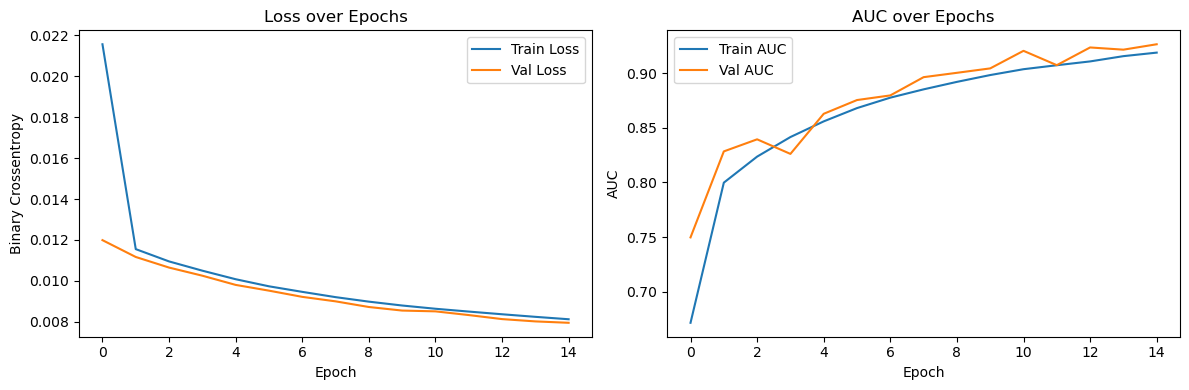

In [33]:
plot_history(history)

In [35]:
save_dir = '../models'
graph_dkt_model.save(f'{save_dir}/dkt_model_text_emb.keras')  